<a href="https://colab.research.google.com/github/quanntuit2203/CS114.O11-License-Plate-Detection/blob/main/CS114_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!git clone https://github.com/Zrmikstri/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt # install dependencies
%pip install -q roboflow

Cloning into 'yolov5'...
remote: Enumerating objects: 12355, done.
remote: Total 12355 (delta 0), reused 0 (delta 0), pack-reused 12355
Receiving objects: 100% (12355/12355), 12.79 MiB | 18.60 MiB/s, done.
Resolving deltas: 100% (8448/8448), done.
/content/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 13.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-ai-generativelanguage 0.4.0 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.19.5, but you have protobuf 3.20.1 which is incompatible.
google-api-core 2.11.1 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0.dev0,>=3.19.5, but you have protobuf 3.20.1 which is incompatible.
google-cloud-aiplatfor

In [5]:
import os
import cv2
import imutils
import torch
import glob

from google.colab.patches import cv2_imshow
from IPython.display import Image, display, clear_output  # to display images

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")


Setup complete. Using torch 2.1.0+cu121 (CPU)


In [6]:
from roboflow import Roboflow

In [7]:
os.environ["DATASET_DIRECTORY"] = "/content/datasets"

In [8]:
rf = Roboflow(api_key="w8tvYodOoFXEneSiypNC")
project = rf.workspace("projectcs114").project("license-plate-detection-uqzqt")
dataset = project.version(3).download("yolov5")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to /content/datasets/License-Plate-Detection-3 in yolov5pytorch:: 100%|██████████| 6968/6968 [00:01<00:00, 4081.11it/s]


In [9]:
with open('/content/datasets/License-Plate-Detection-3/data.yaml','a+') as yamlfile:
        yamlfile.write('\ntest: /content/datasets/License-Plate-Detection-3/test/images')

In [ ]:
!python train.py --weights yolov5l.pt --img 640 --batch-size -1 --epochs 150 --data {dataset.location}/data.yaml  --cache --project "/content/drive/MyDrive/Pro_Cs114" --name Save_RS


2024-01-24 15:38:35.828431: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-24 15:38:35.828482: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-24 15:38:35.829818: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-24 15:38:36.886501: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
train: weights=yolov5l.pt, cfg=, data=/content/datasets/License-Plate-Detection-3/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=150, batch_size=-1, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, n

In [ ]:
!python train.py --resume /content/drive/MyDrive/Pro_Cs114/Save_RS5/weights/last.pt

2024-01-24 16:57:09.661465: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-24 16:57:09.661521: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-24 16:57:09.662971: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-24 16:57:10.943137: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
train: weights=yolov5s.pt, cfg=, data=data/coco128.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=300, batch_size=16, imgsz=640, rect=False, resume=/content/drive/MyDrive/Pro_Cs114/Save_RS5/weights/last.pt, nosave=False, noval=False, noaut

In [ ]:
!python train.py --resume /content/drive/MyDrive/Pro_Cs114/Save_RS5/weights/last.pt

2024-01-24 17:31:59.599850: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-24 17:31:59.599908: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-24 17:31:59.601835: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-24 17:32:01.455004: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
train: weights=yolov5s.pt, cfg=, data=data/coco128.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=300, batch_size=16, imgsz=640, rect=False, resume=/content/drive/MyDrive/Pro_Cs114/Save_RS5/weights/last.pt, nosave=False, noval=False, noaut

In [10]:
!python val.py --weights /content/drive/MyDrive/Yolov5_censor_license_plate_config/1_label_best.pt --data {dataset.location}/data.yaml --task val --iou-thres 0.5


val: data=/content/datasets/License-Plate-Detection-3/data.yaml, weights=['/content/drive/MyDrive/Yolov5_censor_license_plate_config/1_label_best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.5, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
/content/yolov5/utils/torch_utils.py:75: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  elif not cpu and getattr(torch, 'has_mps', False) and torch.backends.mps.is_available():  # prefer MPS if available
YOLOv5 🚀 v6.1-268-gecc2bde Python-3.10.12 torch-2.1.0+cu121 CPU

Fusing layers... 
Model summary: 367 layers, 46108278 parameters, 0 gradients, 107.6 GFLOPs
100% 755k/755k [00:00<00:00, 17.9MB/s]
val: Scanning '/content/datasets/License-Plate-Detection-3/valid/labels' images and labels...684 found, 0 missing, 0 empty, 0 corrupt: 100% 

P_CURVE.PNG


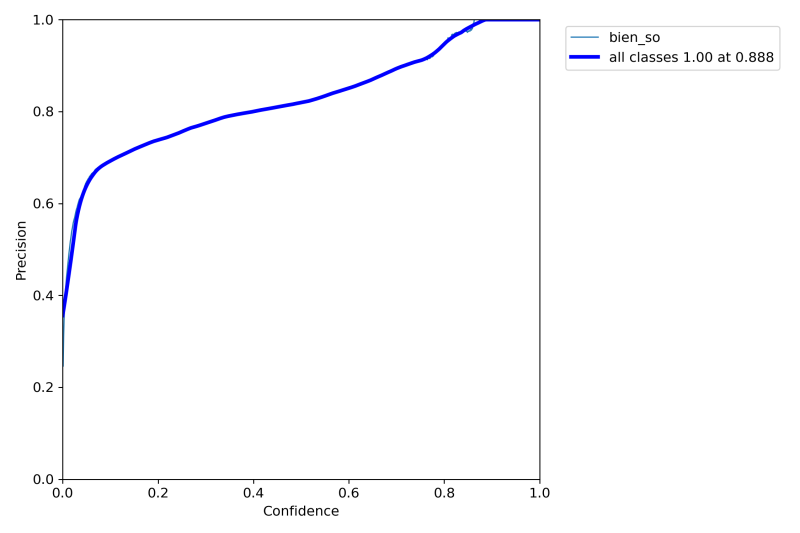





F1_CURVE.PNG


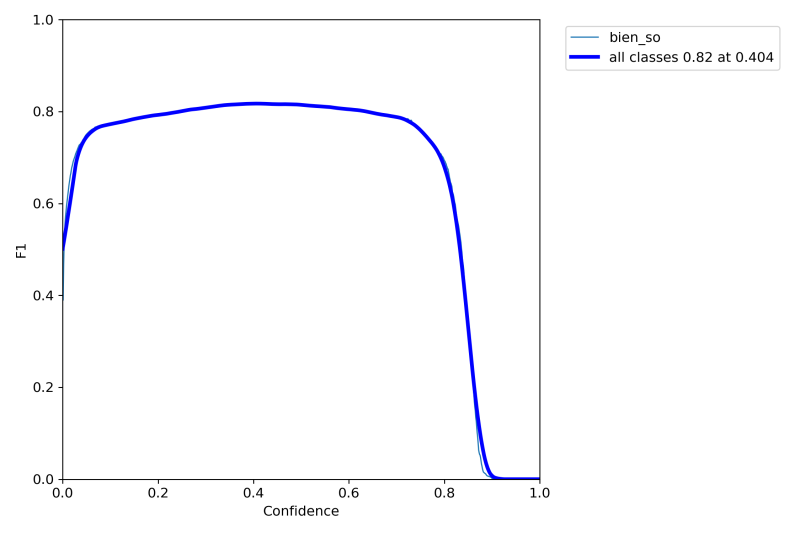





PR_CURVE.PNG


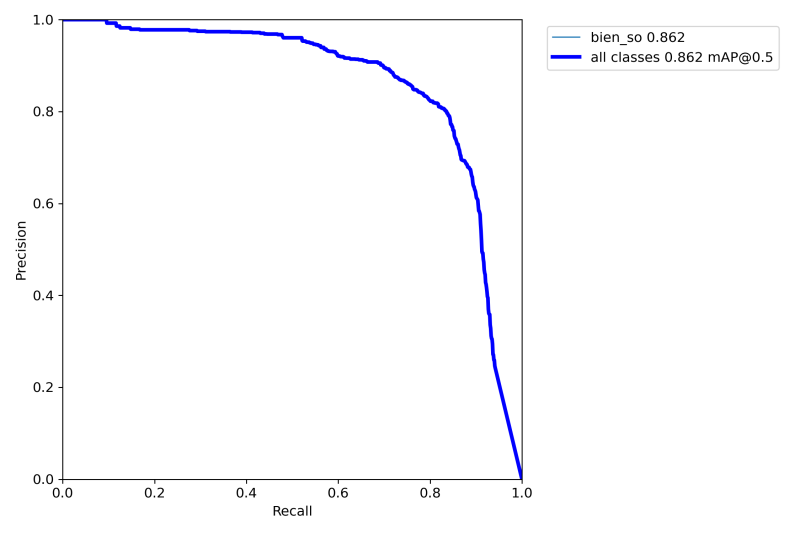





CONFUSION_MATRIX.PNG


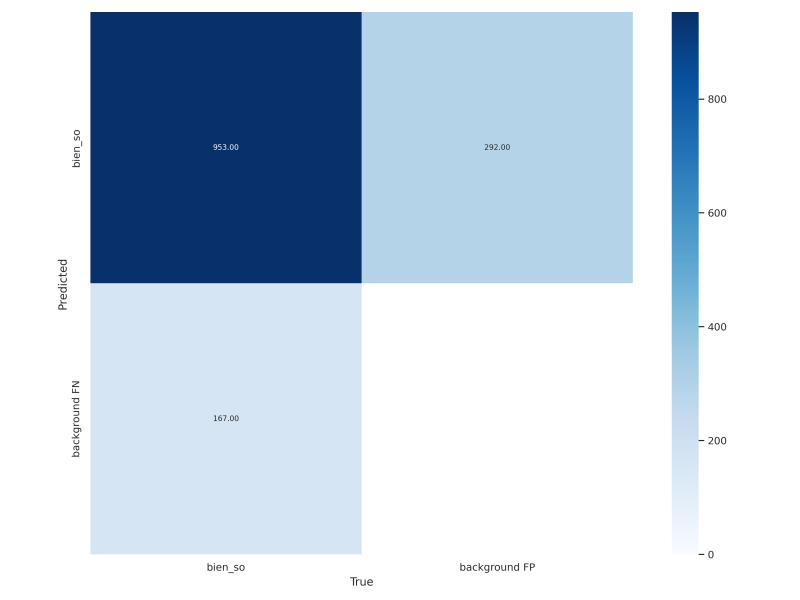





R_CURVE.PNG


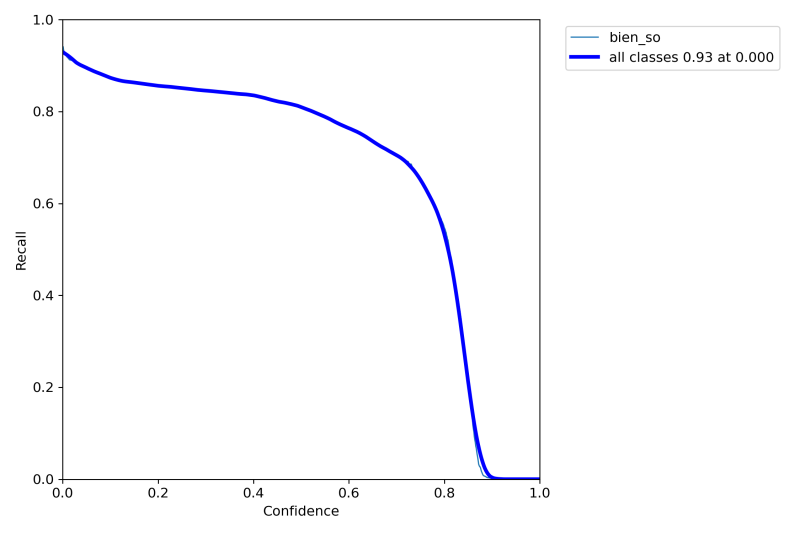

In [11]:
for imageName in glob.glob('/content/yolov5/runs/val/exp/*.png'):
    print(os.path.basename(imageName).upper())
    img = cv2.imread(imageName)
    img = imutils.resize(img, width=800)
    cv2_imshow(img)
    print('\n\n\n')

In [12]:
!python val.py --weights /content/drive/MyDrive/Yolov5_censor_license_plate_config/1_label_best.pt --data {dataset.location}/data.yaml --task test --iou-thres 0.5


val: data=/content/datasets/License-Plate-Detection-3/data.yaml, weights=['/content/drive/MyDrive/Yolov5_censor_license_plate_config/1_label_best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.5, task=test, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
/content/yolov5/utils/torch_utils.py:75: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  elif not cpu and getattr(torch, 'has_mps', False) and torch.backends.mps.is_available():  # prefer MPS if available
YOLOv5 🚀 v6.1-268-gecc2bde Python-3.10.12 torch-2.1.0+cu121 CPU

Fusing layers... 
Model summary: 367 layers, 46108278 parameters, 0 gradients, 107.6 GFLOPs
test: Scanning '/content/datasets/License-Plate-Detection-3/test/labels' images and labels...341 found, 0 missing, 0 empty, 0 corrupt: 100% 341/341 [00:00<00:00, 845.72it/s]
test

P_CURVE.PNG


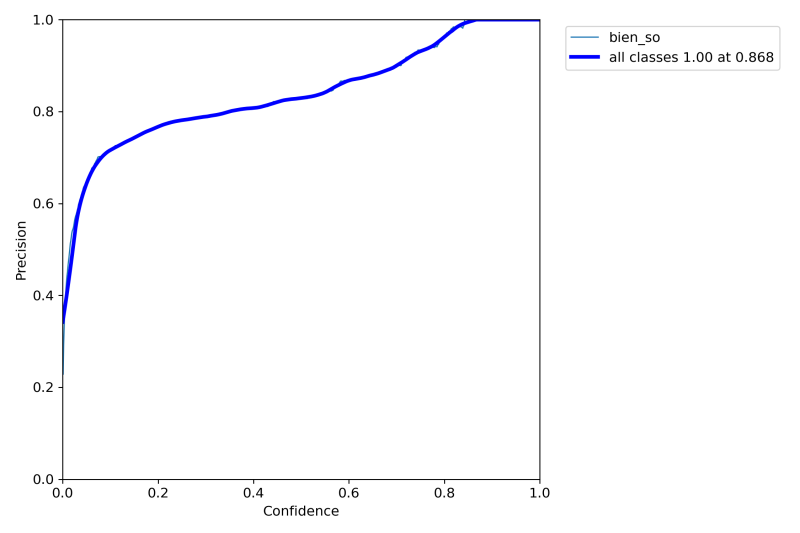





F1_CURVE.PNG


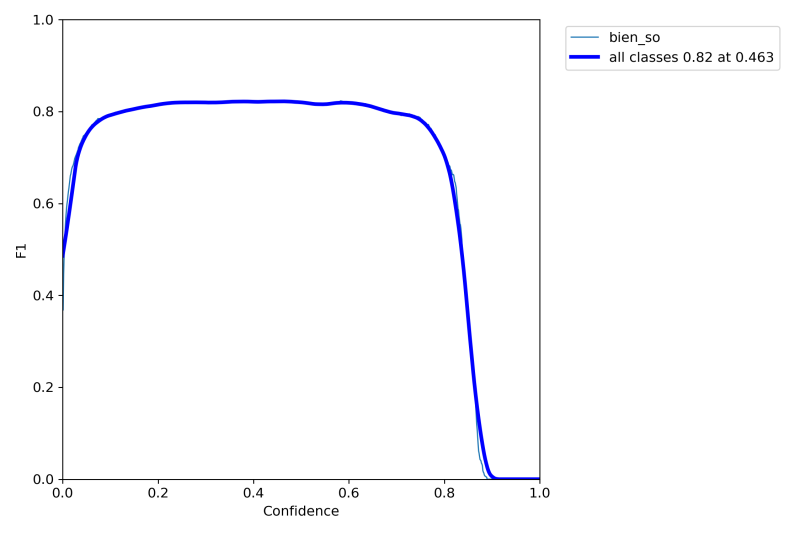





PR_CURVE.PNG


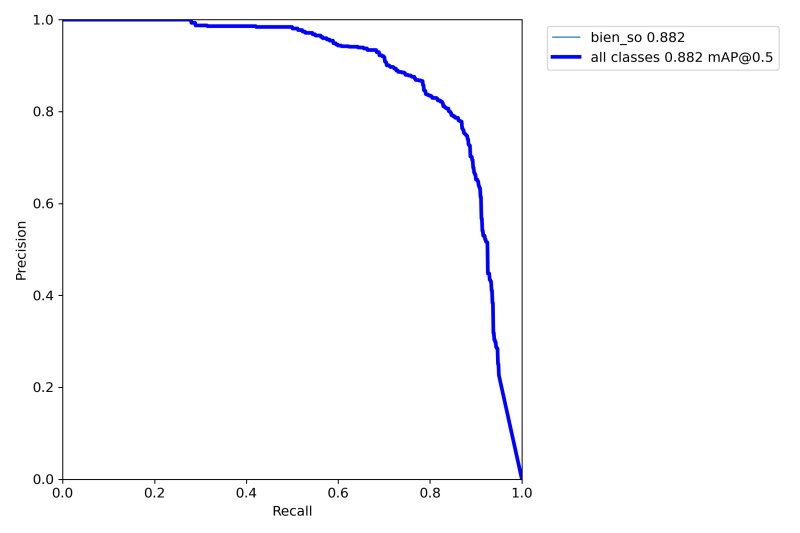





CONFUSION_MATRIX.PNG


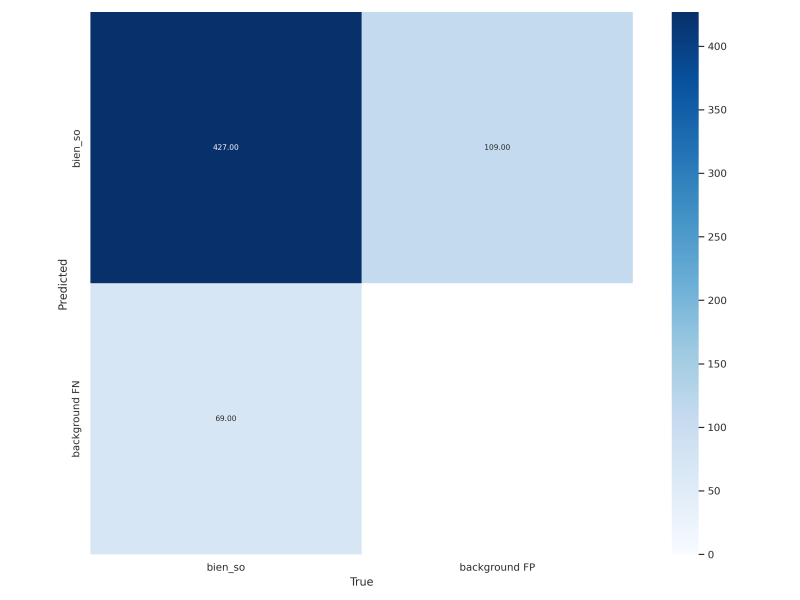





R_CURVE.PNG


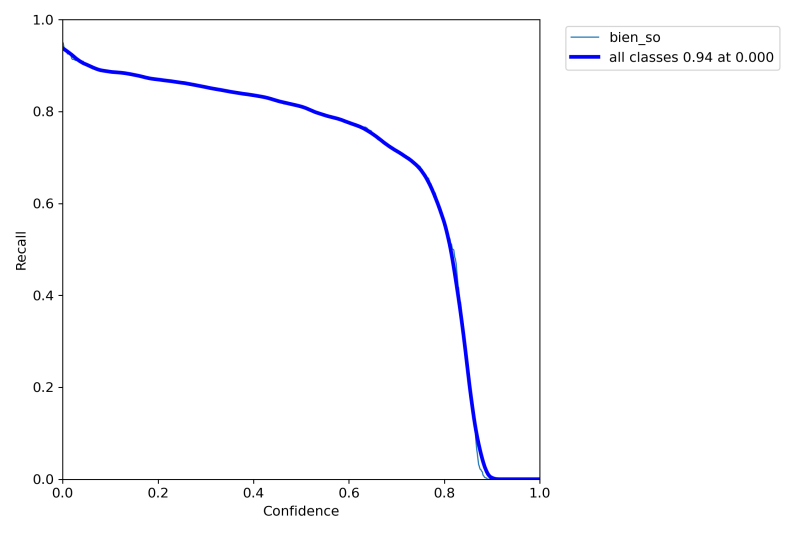

In [13]:
for imageName in glob.glob('runs/val/exp2/*.png'):
    print(os.path.basename(imageName).upper())
    img = cv2.imread(imageName)
    img = imutils.resize(img, width=800)
    cv2_imshow(img)
    print('\n\n\n')

detect: weights=['/content/drive/MyDrive/Yolov5_censor_license_plate_config/1_label_best.pt'], source=/content/download.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, censor=False, hide_conf=False, half=False, dnn=False
/content/yolov5/utils/torch_utils.py:75: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  elif not cpu and getattr(torch, 'has_mps', False) and torch.backends.mps.is_available():  # prefer MPS if available
YOLOv5 🚀 v6.1-268-gecc2bde Python-3.10.12 torch-2.1.0+cu121 CPU

Fusing layers... 
Model summary: 367 layers, 46108278 parameters, 0 gradients, 107.6 GFLOPs
image 1/1 /content/download.jpg: 384x640 2 bien_sos, Done. (1.296s)
Speed: 5.2ms pr

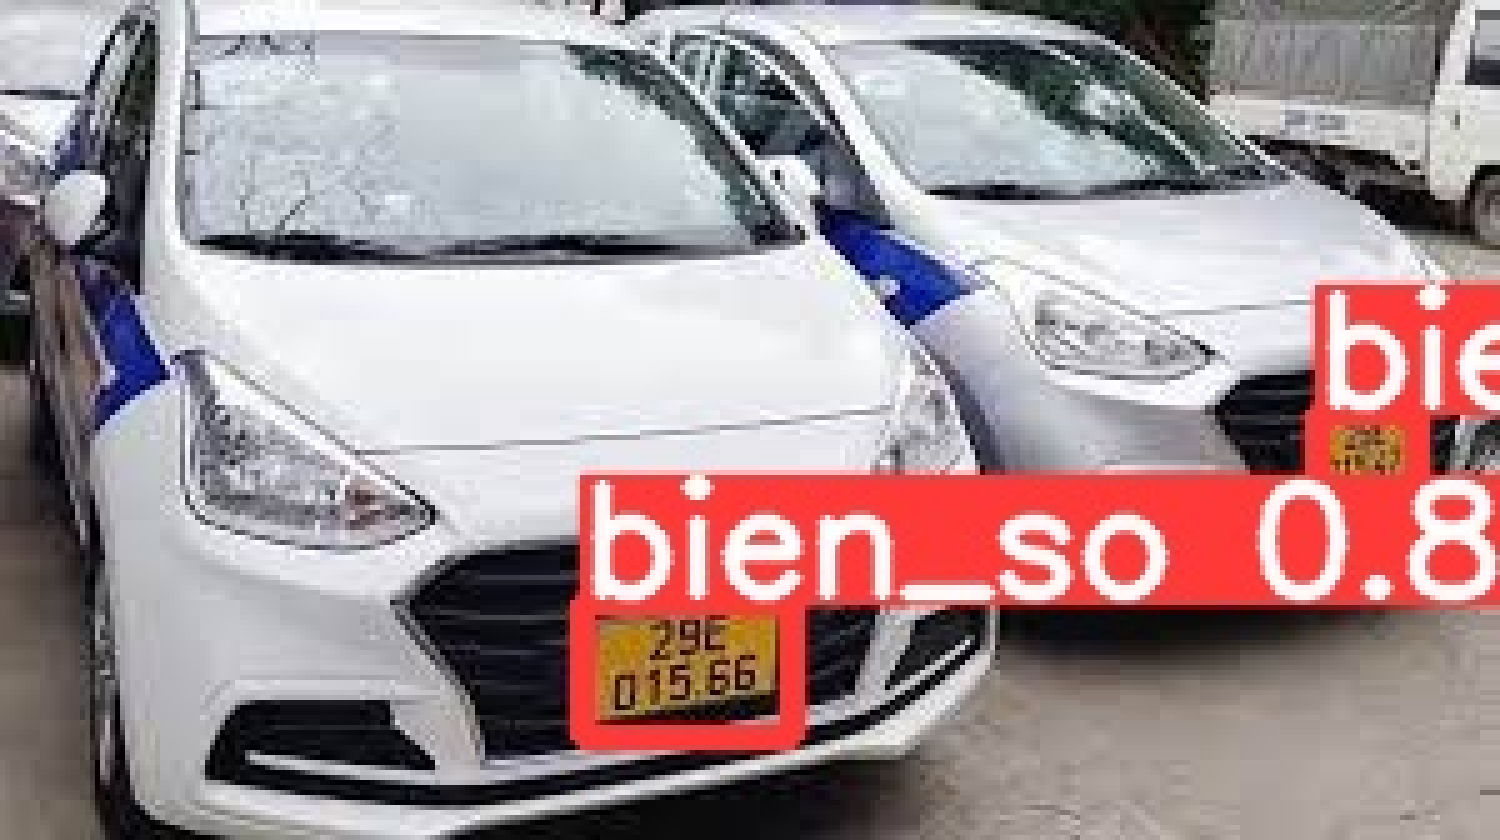

In [17]:
!python detect.py --weights /content/drive/MyDrive/Yolov5_censor_license_plate_config/1_label_best.pt --img 640 --source /content/download.jpg
img = cv2.imread('/content/yolov5/runs/detect/exp/download.jpg')
img = imutils.resize(img, width=1500)
cv2_imshow(img)

detect: weights=['/content/drive/MyDrive/Yolov5_censor_license_plate_config/1_label_best.pt'], source=/content/download.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, censor=True, hide_conf=False, half=False, dnn=False
/content/yolov5/utils/torch_utils.py:75: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  elif not cpu and getattr(torch, 'has_mps', False) and torch.backends.mps.is_available():  # prefer MPS if available
YOLOv5 🚀 v6.1-268-gecc2bde Python-3.10.12 torch-2.1.0+cu121 CPU

Fusing layers... 
Model summary: 367 layers, 46108278 parameters, 0 gradients, 107.6 GFLOPs
image 1/1 /content/download.jpg: 384x640 2 bien_sos, Done. (1.944s)
Speed: 2.7ms pre

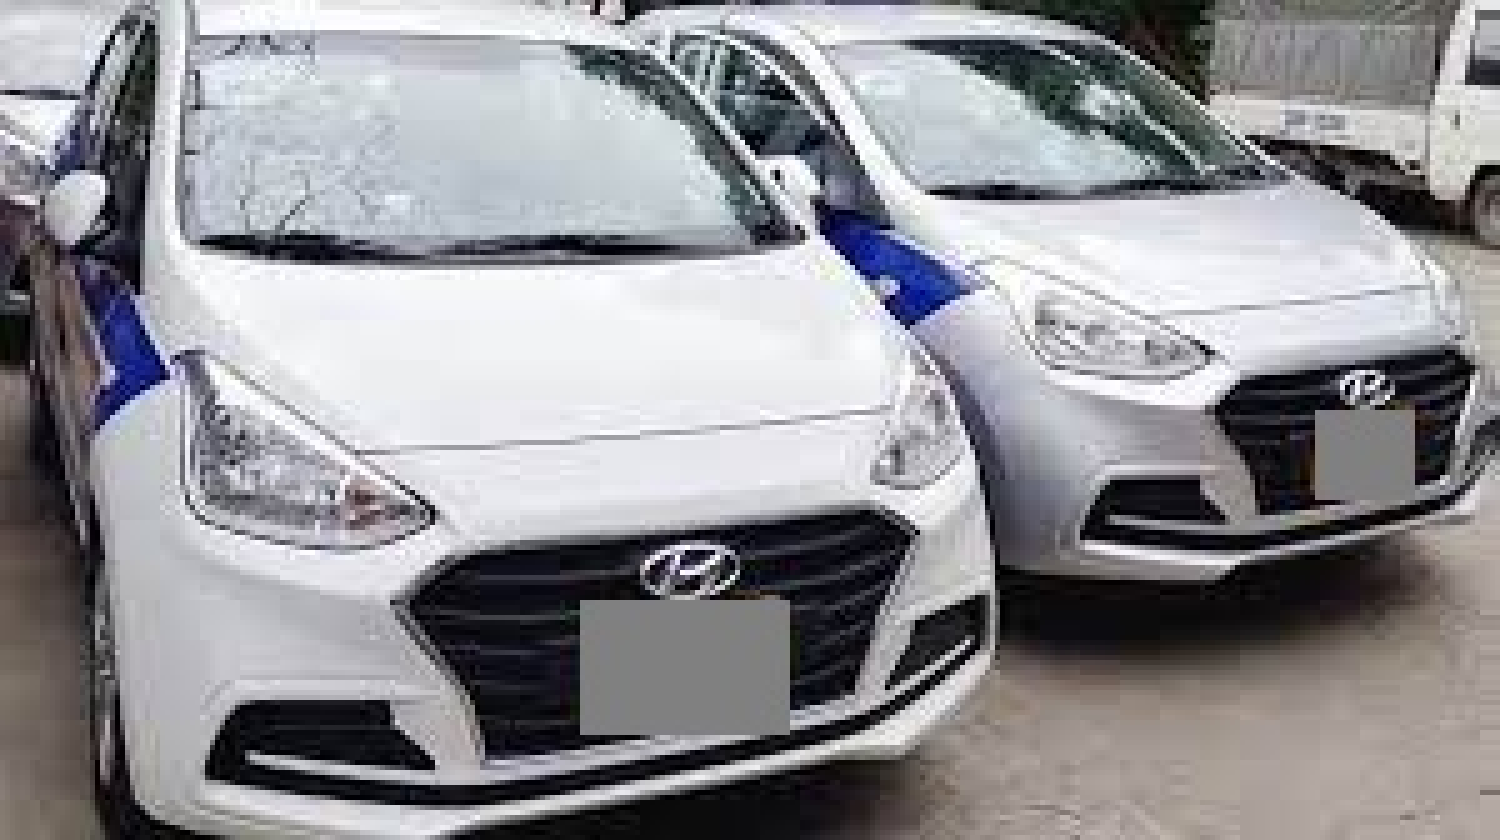

In [18]:
!python detect.py --weights /content/drive/MyDrive/Yolov5_censor_license_plate_config/1_label_best.pt --censor --img 640 --source /content/download.jpg
img = cv2.imread('/content/yolov5/runs/detect/exp2/download.jpg')
img = imutils.resize(img, width=1500)
cv2_imshow(img)